<a href="https://colab.research.google.com/github/digitalminimal/w7/blob/main/d1/Custom_Pipelines_Walkthrough_60_minutes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline

class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

# this function takes a dataframe as input and
# returns a modified version thereof
def process_dataframe(input_df):
    input_df["text"] = input_df["text"].map(lambda t: t.upper())
    return input_df

# sample dataframe
df = pd.DataFrame({
    "id":[1,2,3,4],
    "text":["foo","Bar","BAz","quux"]
})

# this pipeline has a single step
pipeline = Pipeline([
    ("uppercase", DataframeFunctionTransformer(process_dataframe))
])

# apply the pipeline to the input dataframe
pipeline.fit_transform(df)

,id,text
0,1,FOO
1,2,BAR
2,3,BAZ
3,4,QUUX


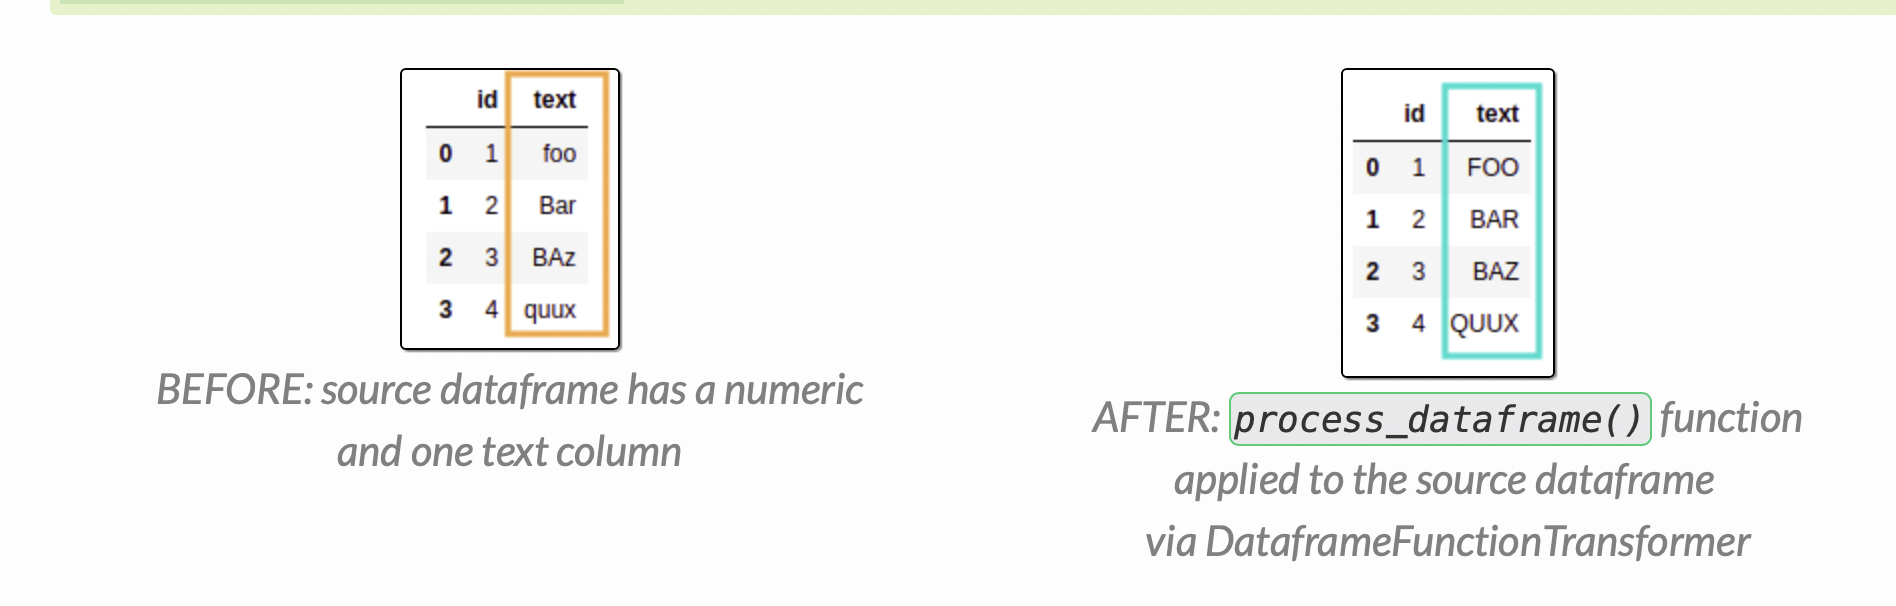

In [13]:
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.base import TransformerMixin,BaseEstimator

from sklearn.pipeline import Pipeline
import sklearn
import pandas as pd
import numpy as np
import scipy

In [14]:
data = scipy.sparse.csr_matrix([
    [1.,0.,0.,0.,0.,0.],
    [0.,1.,0.,0.,0.,0.],
    [1.,0.,0.,0.,0.,0.],
    [0.,0.,0.,0.,1.,0.],
    [0.,0.,0.,1.,0.,0.],
    [1.,0.,0.,0.,0.,0.],
    [1.,1.,0.,0.,0.,0.],
    [1.,1.,0.,0.,0.,0.],
])

target = np.array([1,1,1,0,0,0,1,1])

In [16]:
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

class ToDenseTransformer():

    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

# need to make matrices dense because PCA does not work with sparse vectors.
pipeline = Pipeline([
    ('to_dense',ToDenseTransformer()),
    ('pca',PCA()),
    ('clf',DecisionTreeClassifier())
])

pipeline.fit(data,target)
pipeline.predict(data)


array([1, 1, 1, 0, 0, 1, 1, 1])

In [17]:
import pandas as pd

from sklearn.pipeline import Pipeline

class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X[self.columns].copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

df = pd.DataFrame({
    'name':['alice','bob','charlie','david','edward'],
    'age':[24,32,np.nan,38,20]
})

# create a pipeline with a single transformer
pipe = Pipeline([
    ('selector', SelectColumnsTransformer(["name"]))
])

pipe.fit_transform(df)

,name
0,alice
1,bob
2,charlie
3,david
4,edward


In [ ]:
import pandas as pd

from sklearn.pipeline import Pipeline

class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X[self.columns].copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

df = pd.DataFrame({
    'name':['alice','bob','charlie','david','edward'],
    'age':[24,32,np.nan,38,20]
})

# create a pipeline with a single transformer
pipe = Pipeline([
    ('selector', SelectColumnsTransformer(["name"]))
])

pipe.fit_transform(df)

In [ ]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = pd.DataFrame({
    'name':['alice','bob','charlie','david','edward'],
    'age':[24,32,np.nan,38,20]
})

transformer_step = ColumnTransformer([
        ('impute_mean', SimpleImputer(strategy='mean'), ['age'])
    ], remainder='passthrough')

pipe = Pipeline([
    ('select', select)
])

# fit as you would a normal transformer
pipe.fit(features)

# transform the input
pipe.transform(features)

In [ ]:
import pandas as pd

from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer

# dummy dataframe
df = pd.DataFrame({
    'text':[
        'Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
        'Sed accumsan congue enim non pretium.',
        'In hac habitasse platea dictumst.',
        'Sed tincidunt ipsum nec urna vulputate luctus.'
    ],
    'target':[0, 1, 0, 1]
})

# function takes a dataframe row and a stemmer
def stem_str(input_series, stemmer):

    def stem(input_str):
        return " ".join([stemmer.stem(t) for t in input_str.split(" ")]).strip()

    return input_series.apply(stem)

pipeline = Pipeline([
    ('stemmer', FunctionTransformer(
        func=stem_str,                        # function to be used
        kw_args={'stemmer': RSLPStemmer()})), # parameters to the function
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# now use it like you would any pipeline
pipeline.fit(df["text"],df["target"])

In [ ]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# this is the input dataframe
df = pd.DataFrame({
    'favorite_color':['blue','green','red','green','blue'],
    'age': [10,15,10,np.nan,10],
    'target':[1,0,1,0,1]
})

# define individual transformers in a pipeline
categorical_preprocessing = Pipeline([('ohe', OneHotEncoder())])
numerical_preprocessing = Pipeline([('imputation', SimpleImputer())])

# define which transformer applies to which columns
preprocess = ColumnTransformer([
    ('categorical_preprocessing', categorical_preprocessing, ['favorite_color']),
    ('numerical_preprocessing', numerical_preprocessing, ['age'])
])

# create the final pipeline with preprocessing steps and 
# the final classifier step
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('clf', DecisionTreeClassifier())
])

# now fit the pipeline using the whole dataframe
df_features = df[['favorite_color','age']]
df_target = df['target']

# call fit on the dataframes
pipeline.fit(df_features, df_target)

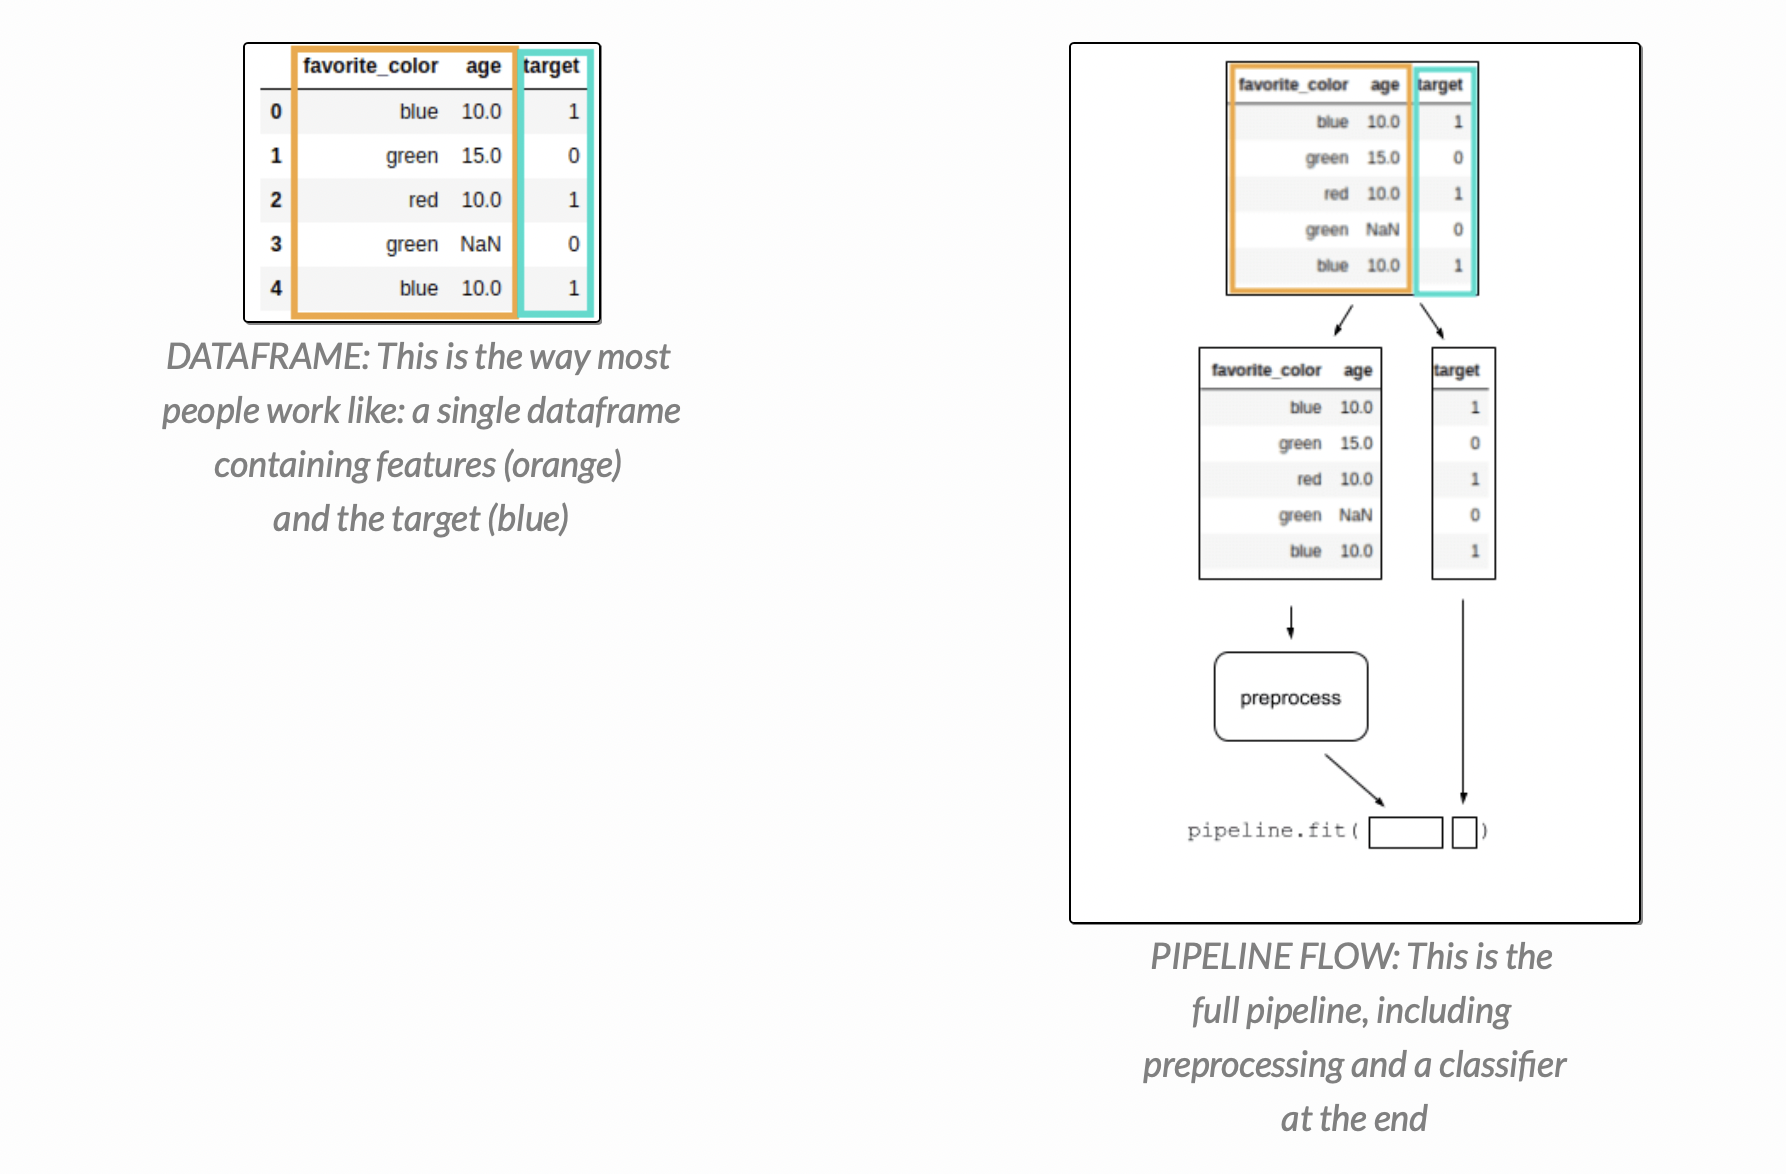